In [328]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# DATA INFORMATION

In [329]:
df = pd.read_csv('./data/traffic.csv', encoding='unicode_escape')

In [330]:
display(df.info())
display(df.describe().T)
display(df.isnull().sum()[df.isnull().sum() > 0])
display(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21161 entries, 0 to 21160
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              21161 non-null  int64  
 1   Area                              21161 non-null  object 
 2   Date                              21161 non-null  object 
 3   Road                              21161 non-null  object 
 4   Kilometer Point                   21160 non-null  float64
 5   Municipality Name                 21161 non-null  object 
 6   County Name                       21161 non-null  object 
 7   Province Name                     21161 non-null  object 
 8   Fatalties                         21161 non-null  int64  
 9   Serious Injuries                  21161 non-null  int64  
 10  Light Injuries                    21161 non-null  int64  
 11  Total Victims                     21161 non-null  int64  
 12  Unit

None

,count,mean,std,min,25%,50%,75%,max
Year,21161.0,2015.149237,3.371071,2010.0,2012.000,2015.00,2018.00,2021.00
Kilometer Point,21160.0,520203.390629,499531.347438,0.0,21.975,999999.00,999999.00,999999.00
Fatalties,21161.0,0.138935,0.399050,0.0,0.000,0.00,0.00,13.00
Serious Injuries,21161.0,0.998252,0.530494,0.0,1.000,1.00,1.00,23.00
Light Injuries,21161.0,0.396437,0.977519,0.0,0.000,0.00,0.00,25.00
Total Victims,21161.0,1.533623,1.196765,1.0,1.000,1.00,2.00,49.00
Units Involved,21161.0,1.888947,0.780887,1.0,1.000,2.00,2.00,21.00
Pedestrains Involved,21161.0,0.247058,0.503691,0.0,0.000,0.00,0.00,10.00
Bicycles Involved,21161.0,0.090166,0.330690,0.0,0.000,0.00,0.00,8.00
Mopeds Involved,21161.0,0.080195,0.278134,0.0,0.000,0.00,0.00,5.00


Kilometer Point                         1
Road Speed Limit                     2642
Surrounding Environment                32
Special Lane Presence                1349
Special Traffic Measures               40
Traffic Regulation and Priority     14970
Direction of Road                    3496
Subtype of Road Section             14212
Road Ownership                      10712
Road's Altimetric Layout             7637
dtype: int64

Index(['Year', 'Area', 'Date ', 'Road ', 'Kilometer Point',
       'Municipality Name ', 'County Name ', 'Province Name ', 'Fatalties',
       'Serious Injuries ', 'Light Injuries ', 'Total Victims ',
       'Units Involved ', 'Pedestrains Involved', 'Bicycles Involved',
       'Mopeds Involved', 'Motorcycles', 'Light Vehicles Involved ',
       'Heavy Vehicles Involved', 'Other Units Involved',
       'Unspecified Units Involved', 'Road Speed Limit',
       'Accident with Hit and Run', 'Fog Presence ', 'Surrounding Environment',
       'Special Lane Presence', 'Special Traffic Measures',
       'Weather Conditions ', 'Special Road Functions ',
       'Severity of Accident ', 'Influence of Fog ',
       'Influence of Environment', 'Influence of Traffic',
       'Influence of Weather', 'Influence of Wind Intensity ',
       'Influence of Lighting', 'Influence of Special Measures',
       'Influence of Road Objects', 'Influence of Road Surface ',
       'Influence of Visibility ', 'Inter

Here we can see that we'll need to encode a lot of columns (41). Also there are many missing values. There are space at the end of columns.

In [331]:
def corriger_encodage(df):
    # Fonction pour corriger l'encodage d'une chaîne de caractères
    def corriger_chaine(chaine):
        if isinstance(chaine, str):
            try:
                return chaine.encode('latin1').decode('utf-8')
            except UnicodeEncodeError:
                return chaine
        return chaine

    # Corriger les valeurs dans le DataFrame
    for col in df.columns:
        df[col] = df[col].apply(corriger_chaine)

    # Corriger les noms de colonnes
    df.columns = [corriger_chaine(col) for col in df.columns]

    return df

In [332]:
# Appliquer la fonction à votre DataFrame
df = corriger_encodage(df)

## NAN VALUES

In [333]:
df.columns = [col.strip() for col in df.columns]

As there is 21 000 rows, I assume to delete the row where kilometer point is NaN. But this column seams to have outliers and is not very important for our ml.

In [334]:
df = df.drop(columns=['Kilometer Point'])

In [335]:
display(df["Road's Altimetric Layout"].unique())
display(df["Speed Limit Information"].unique())

array([nan, 'Pla', 'Rampa o pendent', 'Sense especificar', 'Canvi rasant',
       'Gual'], dtype=object)

array(['Genérica via', 'Senyal velocitat'], dtype=object)

As we can see theses columns are not that usefull.

In [336]:
df = df.drop(columns=["Road's Altimetric Layout", "Speed Limit Information"])

In [337]:
display(df.isnull().sum()[df.isnull().sum() > 0])

Road Speed Limit                    2642
Surrounding Environment               32
Special Lane Presence               1349
Special Traffic Measures              40
Traffic Regulation and Priority    14970
Direction of Road                   3496
Subtype of Road Section            14212
Road Ownership                     10712
dtype: int64

In [338]:
df["Road Speed Limit"].unique()

array([100.,  40.,  80.,  30.,  nan,  50.,  70.,  90.,  60.,  20., 120.,
       110.,  10., 999.,   0.,  45.,  99.,  15.])

There are a lot a strange values as 99,0 and 999.

In [339]:
def transform_value(value):
    if value == 99:
        return 100
    elif value in [0, 999]:
        return np.nan
    else:
        return value

In [340]:
df['Road Speed Limit'] = df['Road Speed Limit'].apply(transform_value)

# Vérifier les valeurs uniques après la transformation
display(df['Road Speed Limit'].unique())
display(df['Road Speed Limit'].isnull().sum())


array([100.,  40.,  80.,  30.,  nan,  50.,  70.,  90.,  60.,  20., 120.,
       110.,  10.,  45.,  15.])

3977

To define NaN values we will use road's information. I saw on Google that Spain speed limit are : In built-up areas: 50 km/h. Road: 70 to 100 km/h. Freeway: 90 to 120 km/h.

In [341]:
def set_speed_limit(row):
    if pd.isna(row['Road Speed Limit']):
        if row['Type of Road'] == 'Via urbana( inclou carrer i carrer residencial)':
            return float(20)
        elif row['Type of Road'] == 'Carretera convencional':
            return float(90)
        elif row['Type of Road'] == 'Camí rural/pista forestal':
            return float(30)
        elif row['Type of Road'] == 'Autopista' or row['Type of Road'] == 'Autovia':
            return float(120)
        else:
            return np.nan
    else:
        return row['Road Speed Limit']


In [342]:
df['Road Speed Limit'] = df.apply(set_speed_limit, axis=1)
display(df['Road Speed Limit'].isnull().sum())

19

We still have 19 missing values, but we can assume to delete theses rows.

In [343]:
df = df.dropna(subset=['Road Speed Limit'])

In [344]:
display(df.isnull().sum()[df.isnull().sum() > 0])

Surrounding Environment               32
Special Lane Presence               1340
Special Traffic Measures              40
Traffic Regulation and Priority    14953
Direction of Road                   3487
Subtype of Road Section            14195
Road Ownership                     10711
dtype: int64

We can assume the same for Surronding Evironment and Special Traffic Measures

In [345]:
df = df.dropna(subset=['Surrounding Environment'])
df = df.dropna(subset=['Special Traffic Measures'])

In [346]:
df["Special Lane Presence"].unique()

array(["No n'hi ha", 'Carril habilitat en sentit contrari habitual',
       'Habilitació voral/carril addicional', 'Carril lent',
       "Carril d'alentiment", 'Altres', 'Carril bus', 'Carril central',
       'Carril bici', 'Carril avançament', 'Carril reversible',
       'Carril acceleració', 'Sense Especificar', nan], dtype=object)

Pour moi, 'Nan' et 'Sens Especificar' correspond à peu près à la même chose. Donc nous pouvons convertir les NaN en Sense Especificar.

In [347]:
def set_sense_especificar(value, by):
    if pd.isna(value):
        return by
    else:
        return value


In [348]:
df['Special Lane Presence'] = df['Special Lane Presence'].apply(lambda value : set_sense_especificar(value=value, by='Sense Especificar'))

In [349]:
df["Traffic Regulation and Priority"].unique()

array(['Sols norma prioritat de pas', 'Senyal Stop o cedeix pas', nan,
       'Semàfor', 'Sols marques viàries (inclou pas vianants)',
       'Persona autoritzada', 'Altres'], dtype=object)

Pour moi, dans ce genre de cas il est difficile d'évaluer les valeurs manquantes. Parce que ça peut être beaucoup de choses ou alors simplement rien. On va donc remplacer les valeurs manquantes par Non indiqué.

In [350]:
df["Traffic Regulation and Priority"] = df["Traffic Regulation and Priority"].apply(lambda value : set_sense_especificar(value=value, by='Sense Especificar'))
df["Traffic Regulation and Priority"].unique()

array(['Sols norma prioritat de pas', 'Senyal Stop o cedeix pas',
       'Sense Especificar', 'Semàfor',
       'Sols marques viàries (inclou pas vianants)',
       'Persona autoritzada', 'Altres'], dtype=object)

In [351]:
df["Direction of Road"].unique()

array(['Un sol sentit', 'Doble sentit', nan, 'Sense especificar'],
      dtype=object)

Idem que précédemment

In [352]:
df["Direction of Road"] = df["Direction of Road"].apply(lambda value : set_sense_especificar(value=value, by='Sense especificar'))
df["Direction of Road"].unique()

array(['Un sol sentit', 'Doble sentit', 'Sense especificar'], dtype=object)

In [353]:
df["Subtype of Road Section"].unique()

array(['Intersecció en T o Y', 'Giratòria', nan,
       'Encreuament o intersecció en X o +', "Enllaç d'entrada o eixida",
       'Sense especificar', 'Pas a nivell'], dtype=object)

idem

In [354]:
df["Subtype of Road Section"] = df["Subtype of Road Section"].apply(lambda value : set_sense_especificar(value=value, by='Sense especificar'))
df["Subtype of Road Section"].unique()

array(['Intersecció en T o Y', 'Giratòria', 'Sense especificar',
       'Encreuament o intersecció en X o +', "Enllaç d'entrada o eixida",
       'Pas a nivell'], dtype=object)

In [355]:
df["Road Ownership"].unique()

array([nan, 'Estatal', 'Municipal', 'Autonòmica', 'Provincial', 'Altres',
       'Sense Especificar'], dtype=object)

idem

In [356]:
df["Road Ownership"] = df["Road Ownership"].apply(lambda value : set_sense_especificar(value=value, by='Sense Especificar'))
df["Road Ownership"].unique()

array(['Sense Especificar', 'Estatal', 'Municipal', 'Autonòmica',
       'Provincial', 'Altres'], dtype=object)

In [357]:
display(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)

Nous n'avons plus de valeurs manquantes !

In [358]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [359]:
df.to_csv('./data/traffic_to_viz.csv')

## Types 

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21102 entries, 0 to 21160
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             21102 non-null  int32         
 1   Area                             21102 non-null  object        
 2   Date                             21102 non-null  datetime64[ns]
 3   Road                             21102 non-null  object        
 4   Municipality Name                21102 non-null  object        
 5   County Name                      21102 non-null  object        
 6   Province Name                    21102 non-null  object        
 7   Fatalties                        21102 non-null  int64         
 8   Serious Injuries                 21102 non-null  int64         
 9   Light Injuries                   21102 non-null  int64         
 10  Total Victims                    21102 non-null  int64         

Les données catégorielles ayant peu valeurs possibles peuvent être traduitent en numériques facilement sous forme binaire. Cependant la haute cardinalité est complexe à gérer pour un modèle de machine learning. De ce fait, même si ces colonnes peuvent être importantes, je prends la décision de ne pas les garder pour mon futur modèle.

In [361]:
df["Area"].unique()

array(['Zona urbana', 'Carretera'], dtype=object)

In [362]:
df['Area'] = df['Area'].map({'Zona urbana': 1, 'Carretera': 0})

In [363]:
df["Road"].unique()

array(['SE', 'N-240', 'N-II', 'AP-7', 'C-31', 'B-522', 'C-14', 'GI-673',
       'LV-3021', 'C-17', 'TP-7225', 'AL', 'C-1415B', 'C-55', 'BP-2121',
       'TV-3405', 'GI-634', 'BV-2415', 'C-66', 'C-59', 'C-243a', 'A-2',
       'B-10', 'N-260', 'C-25', 'C-58', 'BP-1417', 'BP-1101', 'GIV-6612',
       'B-224', 'C-65', 'C-15', 'B-23', 'N-420', 'N-141e', 'BV-5303',
       'C-32', 'C-12', 'N-340', 'TP-2442', 'A-7', 'C-61', 'GI-632',
       'N-141c', 'BV-5001', 'N-340a', 'B-124', 'TP-2311', 'C-233', 'CR40',
       'GI-614', 'C-37', 'C-243C', 'GI-682', 'B-30', 'B-40', 'N-150',
       'C-251', 'T-704', 'TV-7211', 'B-510', 'C-16', 'B-431', 'BV-5128',
       'GI-644', 'GI-623', 'C-155', 'C-51', 'BP-4313', 'C-244', 'T-740',
       'C-13', 'GI-633', 'T-204', 'C-252', 'C-28', 'B-120', 'BV-2241',
       'C-250', 'T-203', 'TV-2001', 'B-231', 'C-35', 'C-1415A', 'BV-5122',
       'N-230', 'TV-3454', 'B-211', 'TV-2041', 'N-145', 'T-340',
       'TV-3409', 'GI-660', 'C-1412a', 'GI-661', 'B-20', 'GI-512',
 

In [364]:
df["Municipality Name"].unique()

array(['CANOVES I SAMALUS', 'LLEIDA', 'FORNELLS DE LA SELVA', 'BARCELONA',
       'BADALONA', 'SANT CARLES DE LA RAPITA', 'MOLLET DEL VALLES',
       'CERDANYOLA DEL VALLES', 'TORROELLA DE MONTGRI', 'ODENA', 'GIRONA',
       'REUS', 'OLOT', 'MANLLEU', 'ORGANYA', 'CALDES DE MALAVELLA',
       'ARTESA DE SEGRE', 'MARTORELL', 'TAGAMANENT', 'TERRASSA',
       'PRAT DE LLOBREGAT, E', 'FULIOLA, LA', 'MANRESA', 'ROQUETES',
       'MORELL, EL', "LLICA D'AMUNT", 'COLLBATO', 'SANT MARTI SARROCA',
       'ALELLA', 'CORNELLA DE LLOBREGAT', 'CALAFELL', 'SANT POL DE MAR',
       'TORROELLA DE FLUVIA', 'VIDRERES', 'AMPOSTA',
       'SANT BOI DE LLOBREGAT', 'ALCANAR', 'VERGES', 'GAVA', 'OLERDOLA',
       'SITGES', 'FIGUERES', 'FLACA', 'PALAFRUGELL', 'CALDES DE MONTBUI',
       'CABRERA DE MAR', 'MONTESQUIU', 'SANTA PERPETUA DE MO',
       'CASTELLBELL I EL VIL', 'MATARO', 'LLORET DE MAR', 'SABADELL',
       'VILAFRANCA DEL PENEDES', 'MONTCADA I REIXAC',
       'SANT ADRIA DE BESOS', 'TARRAGONA', 'PONT

In [365]:
df["Influence of Lighting"].unique()

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [366]:
df["County Name"].unique()

array(['Valles Oriental', 'Segria', 'Girones', 'Barcelones', 'Montsia',
       'Valles Occidental', 'Baix Emporda', 'Anoia', 'Baix Camp',
       'Garrotxa', 'Osona', 'Alt Urgell', 'Selva', 'Noguera',
       'Baix Llobregat', 'Urgell', 'Bages', 'Baix Ebre', 'Tarragones',
       'Alt Penedes', 'Maresme', 'Baix Penedes', 'Alt Emporda', 'Garraf',
       'Segarra', 'Bergueda', "Pla d'Urgell", 'Moianès', 'Alt Camp',
       'Pallars Sobira', 'Conca de Barbera', 'Alta Ribagorca',
       "Pla de l'Estany", 'Solsones', 'Priorat', "Val d'Aran", 'Cerdanya',
       'Garrigues', "Ribera d'Ebre", 'Ripolles', 'Pallars Jussa',
       'Terra Alta'], dtype=object)

In [367]:
display(df["Province Name"].unique())
df["Province Name"] = df["Province Name"].map({'Barcelona': 3, 'Lleida': 2, 'Girona' : 1, 'Tarragona': 0})

array(['Barcelona', 'Lleida', 'Girona', 'Tarragona'], dtype=object)

In [368]:
display(df["Accident with Hit and Run"].unique())
df["Accident with Hit and Run"] = df["Accident with Hit and Run"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense Especificar'], dtype=object)

In [369]:
display(df["Fog Presence"].unique())
df["Fog Presence"] = df["Fog Presence"].map({'Si': 1, "No n'hi ha": 0})

array(["No n'hi ha", 'Si'], dtype=object)

In [370]:
display(df["Surrounding Environment"].unique())
df["Surrounding Environment"] = df["Surrounding Environment"].map({'Desmunt': 3, 'A nivell': 2, 'Mixt' : 1, 'Terraplé': 0, 'Sense Especificar' : -1})

array(['Desmunt', 'A nivell', 'Sense Especificar', 'Mixt', 'Terraplé'],
      dtype=object)

In [371]:
display(df["Special Lane Presence"].unique())

array(["No n'hi ha", 'Carril habilitat en sentit contrari habitual',
       'Habilitació voral/carril addicional', 'Carril lent',
       "Carril d'alentiment", 'Altres', 'Carril bus', 'Carril central',
       'Carril bici', 'Carril avançament', 'Carril reversible',
       'Carril acceleració', 'Sense Especificar'], dtype=object)

In [372]:
display(df["Special Traffic Measures"].unique())
df["Special Traffic Measures"] = df["Special Traffic Measures"].map({'Control policial' : 5, 'Cons' : 4, 'Accident trànsit anterior': 3, 'A Esdeveniment extraordinari': 2, 'Serveis de neteja o manteniment' : 1, 'Obres': 0, "No n'hi ha" : -1})

array(["No n'hi ha", 'Obres', 'Serveis de neteja o manteniment',
       'Esdeveniment extraordinari', 'Accident trànsit anterior', 'Cons',
       'Control policial'], dtype=object)

In [373]:
display(df["Weather Conditions"].unique())
df["Weather Conditions"] = df["Weather Conditions"].map({'Calamarsa' : 4, 'Bon temps': 3, 'Pluja forta': 2, 'Pluja dèbil' : 1, 'Nevant': 0, 'Sense especificar' : -1})

array(['Bon temps', 'Pluja forta', 'Pluja dèbil', 'Nevant',
       'Sense especificar', 'Calamarsa'], dtype=object)

In [374]:
display(df["Special Road Functions"].unique())
df["Special Road Functions"] = df["Special Road Functions"].map({'Sense funció especial' : 3, 'Variant': 2, 'Travessera': 1, 'Ronda, cinturo o circumval.lacio' : 0, 'Sense especificar' : -1})

array(['Sense funció especial', 'Variant', 'Travessera',
       'Ronda, cinturo o circumval.lacio', 'Sense especificar'],
      dtype=object)

In [375]:
display(df["Severity of Accident"].unique())
df["Severity of Accident"] = df["Severity of Accident"].map({'Accident greu': 1, "Accident mortal": 0})

array(['Accident greu', 'Accident mortal'], dtype=object)

In [376]:
display(df["Influence of Fog"].unique())
df["Influence of Fog"] = df["Influence of Fog"].map({'Si': 1, "No": 0, 'Sense especificar' : -1})

array(['No', 'Sense especificar', 'Si'], dtype=object)

In [377]:
display(df["Influence of Environment"].unique())
df["Influence of Environment"] = df["Influence of Environment"].map({'Si': 1, "No": 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [378]:
display(df["Influence of Traffic"].unique())
df["Influence of Traffic"] = df["Influence of Traffic"].map({'Si': 1, "No": 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [379]:
display(df["Influence of Weather"].unique())
df["Influence of Weather"] = df["Influence of Weather"].map({'Si': 1, "No": 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [380]:
display(df["Influence of Wind Intensity"].unique())
df["Influence of Wind Intensity"] = df["Influence of Wind Intensity"].map({'Si': 1, "No": 0, 'Sense especificar' : -1})

array(['No', 'Sense especificar', 'Si'], dtype=object)

In [381]:
display(df["Influence of Lighting"].unique())
df["Influence of Lighting"] = df["Influence of Lighting"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [382]:
display(df["Influence of Special Measures"].unique())
df["Influence of Special Measures"] = df["Influence of Special Measures"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [383]:
display(df["Influence of Road Objects"].unique())
df["Influence of Road Objects"] = df["Influence of Road Objects"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [384]:
display(df["Influence of Road Surface"].unique())
df["Influence of Road Surface"] = df["Influence of Road Surface"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Si', 'Sense especificar'], dtype=object)

In [385]:
display(df["Influence of Visibility"].unique())
df["Influence of Visibility"] = df["Influence of Visibility"].map({'Si': 1, 'No': 0, 'Sense especificar' : -1})

array(['No', 'Sense especificar', 'Si'], dtype=object)

In [386]:
display(df["Intersection Characteristics"].unique())
df["Intersection Characteristics"] = df["Intersection Characteristics"].map({'Arribant o eixint intersecció fins 50m': 2, 'Dintre intersecció': 1, 'En secció' : 0})

array(['Arribant o eixint intersecció fins 50m', 'Dintre intersecció',
       'En secció'], dtype=object)

In [387]:
display(df["Lighting Conditions"].unique())
df["Lighting Conditions"] = df["Lighting Conditions"].map({'De nit, il·luminació artificial suficient' : 5, 'De dia, dia clar' : 4, 'De nit, sense llum artificial': 3, 'De dia, dia fosc': 2, 'Alba o capvespre' : 1, 'De nit, il·luminació artificial insuficient': 0, "Sense especificar" : -1})

array(['De nit, il·luminació artificial suficient', 'De dia, dia clar',
       'De nit, sense llum artificial', 'De dia, dia fosc',
       'Alba o capvespre', 'De nit, il·luminació artificial insuficient',
       'Sense especificar'], dtype=object)

In [388]:
display(df["Traffic Regulation and Priority"].unique())
df["Traffic Regulation and Priority"] = df["Traffic Regulation and Priority"].map({'Sols norma prioritat de pas' : 5, 'Senyal Stop o cedeix pas' : 4, 'Semàfor': 3, 'Sols marques viàries (inclou pas vianants)': 2, 'Persona autoritzada' : 1, 'Altres': 0, "Sense Especificar" : -1})

array(['Sols norma prioritat de pas', 'Senyal Stop o cedeix pas',
       'Sense Especificar', 'Semàfor',
       'Sols marques viàries (inclou pas vianants)',
       'Persona autoritzada', 'Altres'], dtype=object)

In [389]:
display(df["Direction of Road"].unique())
df["Direction of Road"] = df["Direction of Road"].map({'Doble sentit': 1, 'Un sol sentit': 0, 'Sense especificar' : -1})

array(['Un sol sentit', 'Doble sentit', 'Sense especificar'], dtype=object)

In [390]:
display(df["Subtype of Accident"].unique())

array(['Encalç', 'Resta sortides de via', 'Col·lisió frontal',
       'Envestida (frontal lateral)', 'Caiguda en la via',
       'Atropellament', 'Fregament o col·lisió lateral',
       'Xoc contra objecte/obstacle sense sortida prèvia de via',
       'Altres', 'Sortida de via amb xoc o col·lisió',
       'Sortida de via amb bolcada', 'Sortida de via amb atropellament',
       'Xoc amb animal a la calçada'], dtype=object)

In [391]:
display(df["Subtype of Road Section"].unique())
df["Subtype of Road Section"] = df["Subtype of Road Section"].map({"Pas a nivell": 4, "Enllaç d'entrada o eixida": 3, 'Encreuament o intersecció en X o +': 2, 'Intersecció en T o Y': 1, 'Giratòria': 0, 'Sense especificar' : -1})

array(['Intersecció en T o Y', 'Giratòria', 'Sense especificar',
       'Encreuament o intersecció en X o +', "Enllaç d'entrada o eixida",
       'Pas a nivell'], dtype=object)

In [392]:
display(df["Subzone within Area"].unique())
df["Subzone within Area"] = df["Subzone within Area"].map({'Zona urbana': 2, 'Carretera': 1, 'Travessera' : 0})

array(['Zona urbana', 'Carretera', 'Travessera'], dtype=object)

In [393]:
display(df["Road Surface Conditions"].unique())
df["Road Surface Conditions"] = df["Road Surface Conditions"].map({'Gelat': 5, 'Nevat': 4, 'Inundat': 3, 'Sec i net': 2, 'Relliscós': 1, 'Mullat' : 0, 'Sense especificar' : -1})

array(['Sec i net', 'Relliscós', 'Mullat', 'Inundat', 'Nevat', 'Gelat',
       'Sense especificar'], dtype=object)

In [394]:
display(df["Type of Road"].unique())
df["Type of Road"] = df["Type of Road"].map({'Via urbana( inclou carrer i carrer residencial)': 5, 'Carretera convencional': 4, 'Altres': 3, 'Autopista': 2, 'Autovia': 1, 'Camí rural/pista forestal' : 0})

array(['Via urbana( inclou carrer i carrer residencial)',
       'Carretera convencional', 'Altres', 'Autopista', 'Autovia',
       'Camí rural/pista forestal'], dtype=object)

In [395]:
display(df["Road Ownership"].unique())
df["Road Ownership"] = df["Road Ownership"].map({'Altres': 4, 'Provincial': 3, 'Autonòmica': 2, 'Estatal': 1, 'Municipal': 0, 'Sense Especificar' : -1})

array(['Sense Especificar', 'Estatal', 'Municipal', 'Autonòmica',
       'Provincial', 'Altres'], dtype=object)

In [396]:
display(df["Wind Conditions"].unique())
df["Wind Conditions"] = df["Wind Conditions"].map({'Calma, vent molt suau': 2, 'Vent moderat': 1, 'Vent fort' : 0, 'Sense especificar' : -1})

array(['Calma, vent molt suau', 'Vent moderat', 'Vent fort',
       'Sense especificar'], dtype=object)

In [397]:
display(df["Day of the Week Grouping"].unique())
df["Day of the Week Grouping"] = df["Day of the Week Grouping"].map({'Feiners': 1 , 'CapDeSetmana': 0})

array(['Feiners', 'CapDeSetmana'], dtype=object)

In [398]:
display(df["Time of Day Grouping"].unique())
df["Time of Day Grouping"] = df["Time of Day Grouping"].map({'Nit': 2,'Tarda': 1 , 'Matí': 0})

array(['Nit', 'Tarda', 'Matí'], dtype=object)

In [399]:
display(df["Type of Accident"].unique())
df["Type of Accident"] = df["Type of Accident"].map({'Altres' : 5, "Col.lisió d'un vehicle contra un obstacle de la calcada" : 4,'Atropellament' : 3, 'Col.lisió de vehicles en marxa': 2,'Sortida de la calcada sense especificar': 1 , 'Bolcada a la calcada': 0})

array(['Col.lisió de vehicles en marxa',
       'Sortida de la calcada sense especificar', 'Bolcada a la calcada',
       'Atropellament',
       "Col.lisió d'un vehicle contra un obstacle de la calcada",
       'Altres'], dtype=object)

In [400]:
df["Day Type"].unique()

array(['dill-dij', 'dg', 'dis', 'div'], dtype=object)

Cette colonne fait référence au jour de la semaine où l'accident est arrivé. Cependant on a que 4 valeurs donc je supprime la colonne car les données ne sont pas bonnes.

In [401]:
df = df.drop(columns=["Day Type"])

In [402]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21102 entries, 0 to 21160
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             21102 non-null  int32         
 1   Area                             21102 non-null  int64         
 2   Date                             21102 non-null  datetime64[ns]
 3   Road                             21102 non-null  object        
 4   Municipality Name                21102 non-null  object        
 5   County Name                      21102 non-null  object        
 6   Province Name                    21102 non-null  int64         
 7   Fatalties                        21102 non-null  int64         
 8   Serious Injuries                 21102 non-null  int64         
 9   Light Injuries                   21102 non-null  int64         
 10  Total Victims                    21102 non-null  int64         

## OUTLIERS

In [403]:
display(df.describe().T)

,count,mean,min,25%,50%,75%,max,std
Year,21102.0,2015.152734,2010.0,2012.0,2015.0,2018.0,2021.0,3.371383
Area,21102.0,0.546678,0.0,0.0,1.0,1.0,1.0,0.497828
Date,21102,2015-08-29 07:26:41.933465856,2010-01-01 00:00:00,2012-09-23 00:00:00,2015-07-05 00:00:00,2018-06-30 00:00:00,2021-12-31 00:00:00,NaN
Province Name,21102.0,2.198133,0.0,1.0,3.0,3.0,3.0,1.124171
Fatalties,21102.0,0.139276,0.0,0.0,0.0,0.0,13.0,0.399497
Serious Injuries,21102.0,0.998152,0.0,1.0,1.0,1.0,23.0,0.531057
Light Injuries,21102.0,0.395365,0.0,0.0,0.0,0.0,25.0,0.9659
Total Victims,21102.0,1.532793,1.0,1.0,1.0,2.0,49.0,1.187083
Units Involved,21102.0,1.89001,1.0,1.0,2.0,2.0,21.0,0.780846
Pedestrains Involved,21102.0,0.247607,0.0,0.0,0.0,0.0,10.0,0.504153


Il semble ne pas avoir d'outliers.

## CORRELATION

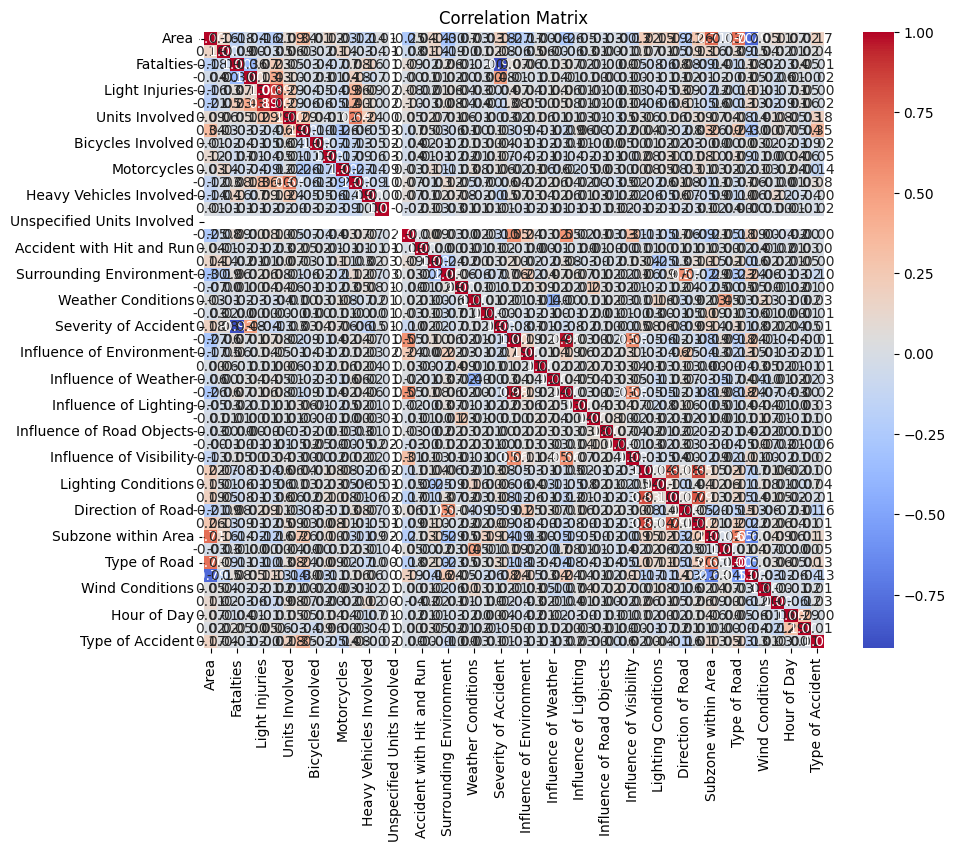

In [404]:
# Select only numerical columns for correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Thanks to this correlation matrix, we can see that there is a strong correlation between the Total Victims and the Light Injuries. That means a hight percentage of victims have light injuries. According to me we can delete Total Victim because normaly the sum of injuries have the be Total Victims. 

In [405]:
display(df["Severity of Accident"].unique())
display(df["Fatalties"].unique())

array([1, 0], dtype=int64)

array([ 0,  1,  4,  2,  3, 13,  7,  5], dtype=int64)

On peut supprimer la colonne severity of Accident. Parce que les colonnes qui énumère le nombre de personne décédé. Cependant on ne peut pas supprimer les colonnes influence of fog et wind intensity parce que ce sont deux choses bien différentes

In [406]:
df = df.drop(columns=["Total Victims"])

In [407]:
df.to_csv('./data/traffic_to_ml.csv')